In [59]:
import pandas as pd
import numpy as np
import yaml as yl
from sklearn.linear_model import LinearRegression


In [50]:
# Options
pd.options.display.max_columns = 57
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 100
pd.options.display.width = None

# Params
params = yl.safe_load(open('C:\\repos\\deprivationMapping\\params.yaml'))
allScoresPath = params['ImdPaths']['AllScoresRaw']
samhiScoresPath = params['ImdPaths']['SamhiScoresRaw']


In [51]:
imd_df = pd.read_csv(allScoresPath)
imd_df.sample(5)

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Rank (where 1 is most deprived),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score","Education, Skills and Training Rank (where 1 is most deprived)","Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)",Health Deprivation and Disability Score,Health Deprivation and Disability Rank (where 1 is most deprived),Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs),Crime Score,Crime Rank (where 1 is most deprived),Crime Decile (where 1 is most deprived 10% of LSOAs),Barriers to Housing and Services Score,Barriers to Housing and Services Rank (where 1 is most deprived),Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs),Living Environment Score,Living Environment Rank (where 1 is most deprived),Living Environment Decile (where 1 is most deprived 10% of LSOAs),Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Children Index (IDACI) Rank (where 1 is most deprived),Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Rank (where 1 is most deprived),Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs),Children and Young People Sub-domain Score,Children and Young People Sub-domain Rank (where 1 is most deprived),Children and Young People Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Adult Skills Sub-domain Score,Adult Skills Sub-domain Rank (where 1 is most deprived),Adult Skills Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Geographical Barriers Sub-domain Score,Geographical Barriers Sub-domain Rank (where 1 is most deprived),Geographical Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Wider Barriers Sub-domain Score,Wider Barriers Sub-domain Rank (where 1 is most deprived),Wider Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Indoors Sub-domain Score,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
14311,E01014759,North Somerset 005D,E06000024,North Somerset,2.466,32501,10,0.021,32134,10,0.020,32283,10,1.675,31240,10,-1.094,29556,9,-0.898,28224,9,19.637,17088,6,2.815,31370,10,0.013,32480,10,0.032,31807,10,-1.074,29912,10,0.139,31115,10,0.708,5766,2,-4.395,31971,10,-1.035,29298,9,-0.894,28449,9,1423,204,612,607,605
7034,E01007227,Wirral 012D,E08000015,Wirral,52.670,1770,1,0.308,1992,1,0.220,2273,1,56.653,2158,1,2.032,316,1,0.608,7630,3,9.071,29447,9,32.815,7282,3,0.375,1949,1,0.409,1697,1,1.279,1949,1,0.476,2947,1,-0.458,23409,8,-0.990,20675,7,0.913,4576,2,-0.276,19920,7,1482,311,819,352,813
27975,E01028707,Vale of White Horse 004F,E07000180,Vale of White Horse,4.017,31492,10,0.014,32627,10,0.021,32106,10,7.532,24445,8,-1.384,31280,10,-1.751,32377,10,26.075,10113,4,6.167,28155,9,0.018,32083,10,0.031,31859,10,-0.436,22978,7,0.229,24141,

In [52]:
samhi_df = pd.read_csv(samhiScoresPath)
samhi_df[samhi_df['year']==2019].sample(5)

,lsoa11,year,prop_ibesa,est_qof_dep,antidep_rate,z_mh_rate,samhi_index,samhi_dec
292468,E01030499,2019,0.000000,9.351085,41.715228,0.129023,0.608791,5
284451,E01022291,2019,3.260870,10.877941,39.271197,0.330359,0.750906,5
289268,E01027219,2019,1.943844,12.934516,42.423408,0.999254,1.175212,7
292397,E01030428,2019,0.809249,9.164420,39.880615,-0.397338,0.451161,4
280300,E01018076,2019,2.257830,12.703397,50.686026,-0.062371,1.503056,8


In [54]:
working_df = pd.merge(imd_df, samhi_df[samhi_df['year']==2019], left_on=['LSOA code (2011)'] , right_on=['lsoa11'])
working_df.sample(5)

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Rank (where 1 is most deprived),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score","Education, Skills and Training Rank (where 1 is most deprived)","Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)",Health Deprivation and Disability Score,Health Deprivation and Disability Rank (where 1 is most deprived),Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs),Crime Score,Crime Rank (where 1 is most deprived),Crime Decile (where 1 is most deprived 10% of LSOAs),Barriers to Housing and Services Score,Barriers to Housing and Services Rank (where 1 is most deprived),Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs),Living Environment Score,Living Environment Rank (where 1 is most deprived),Living Environment Decile (where 1 is most deprived 10% of LSOAs),...,Adult Skills Sub-domain Score,Adult Skills Sub-domain Rank (where 1 is most deprived),Adult Skills Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Geographical Barriers Sub-domain Score,Geographical Barriers Sub-domain Rank (where 1 is most deprived),Geographical Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Wider Barriers Sub-domain Score,Wider Barriers Sub-domain Rank (where 1 is most deprived),Wider Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Indoors Sub-domain Score,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),lsoa11,year,prop_ibesa,est_qof_dep,antidep_rate,z_mh_rate,samhi_index,samhi_dec
29888,E01030671,Runnymede 002A,E07000212,Runnymede,3.196,32110,10,0.009,32799,10,0.005,32825,10,3.189,29518,9,-1.489,31658,10,-0.735,26631,9,20.162,16456,6,12.094,21901,7,...,0.147,30794,10,-0.594,25444,8,1.978,6983,3,-0.056,17350,6,-0.511,23637,8,3176,177,2854,145,2975,E01030671,2019,0.000000,7.872985,22.057513,-1.252302,-0.803697,1
24025,E01024680,Thanet 017E,E07000114,Thanet,15.314,18627,6,0.094,17261,6,0.083,15726,5,19.736,13920,5,-0.132,18097,6,0.405,10367,4,14.356,23815,8,11.411,22559,7,...,0.325,13289,5,-0.379,22190,7,0.320,13618,5,-0.152,18878,6,-0.390,21879,7,1721,339,894,488,912,E01024680,2019,0.922131,15.066713,53.109367,-0.026526,1.844946,9
11734,E01012099,Redcar and Cleveland 010D,E06000003,Redcar and Cleveland,51.595,1936,1,0.365,786,1,0.285,628,1,45.190,4126,2,1.349,2102,1,0.047,15932,5,7.682,30549,10,11.239,22739,7,...,0.414,5932,2,-0.648,26210,8,-1.026,20881,7,0.016,16203,5,-1.107,30314,10,1462,335,874,253,884,E01012099,2019,7.209063,13.632304,79.568845,0.891128,3.478680,10
24994,E01025664,Blaby 012D,E07000129,Blaby,12.017,22152,7,0.050,26192,8,0.058,21960,7,15.644,16866,6,-0.605,24771,8,0.380,10745,4,23.486,12688,4,19.890,15373,5,...,0.271,19289,6,0.926,3920,2,-5.334,32597,10,-0.228,20050,7,0.741,6132,2,1261,186,599,476,618,E01025664,2019,0.954980,12.932060,41.141326,0.048956,0.964133,6
28651,E01029404,Cannock Chase 002E,E07000192,Cannock Chase,30.932,7589,3,0.175,8412,3,0.150,6571,3,26.302,10155,4,0.853,5424,2,0.66

In [57]:
assert len(working_df) == len(imd_df)

In [77]:
# Some basic regressions
deprivationArray = np.array( working_df['Index of Multiple Deprivation (IMD) Score'])
samhiArray = np.array( working_df['samhi_index'])
lin_fit = LinearRegression(fit_intercept=True).fit(deprivationArray.reshape(-1,1), samhiArray.reshape(-1,1))
lin_fit.coef_


array([[0.02170296]])

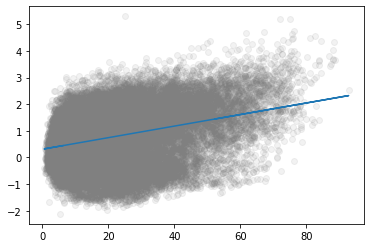

In [76]:
import matplotlib.pyplot as plt
plt.scatter(deprivationArray, samhiArray, alpha=0.1, color='grey')
plt.plot(deprivationArray, lin_fit.predict(deprivationArray.reshape(-1,1)))
plt.show()


In [79]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(deprivationArray, samhiArray)
print(f"slope: {slope}, intercept: {intercept}, r2_value: {r_value*r_value}, p_value: {p_value}, std_err: {std_err}")

slope: 0.021702959332255953, intercept: 0.30812463053858713, r2_value: 0.11321577282296362, p_value: 0.0, std_err: 0.00033516577935469597
